In [2]:
import os
import sys
# Root folder
sys.path.append("../../..")

from PIL import Image

from apis.detectors import OWLViT

from utils.image_utils import visualize_image

In [3]:
detector = OWLViT()

## Test detection

In [28]:
file_path = "../../assets/images/fake_bowl.png"
# Example text queries
text_queries = ['keyboard', 'tape', 'phone', 'mouse', 'bowl']

image = Image.open(file_path)
det_data = detector.detect_objects(
    image=image,
    text_queries=text_queries,
    bbox_score_top_k=20,
    bbox_conf_threshold=0.05
)

# Iterate and print each value
for i, item in enumerate(det_data):
    print(f"--- Detection {i + 1} ---")
    print(f"Box Name: {item['box_name']}")
    print(f"Score: {item['score']}")
    print(f"Box Coordinates: {item['bbox']}")

--- Detection 1 ---
Box Name: bowl
Score: 0.0663597509264946
Box Coordinates: [0.8231936097145081, 0.23058170080184937, 0.9392896294593811, 0.38130173087120056]


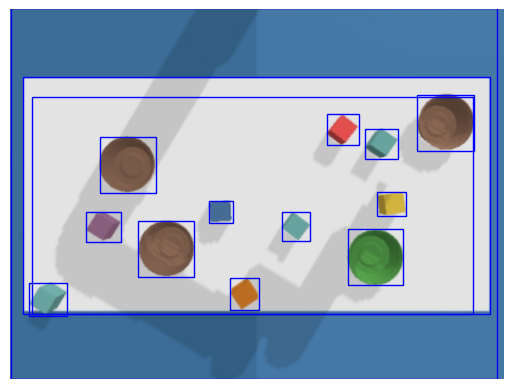

In [27]:
visualize_image(image, bboxes=[obj["bbox"] for obj in det_data])